# California Pacific Ocean Sound Recordings
https://registry.opendata.aws/pacific-sound/

FILES TOO BIG: 

In [1]:
# get data from 2022

In [1]:
import os , glob
import pandas as pd
import xarray as xr
import s3fs, boto3, botocore
import geoviews as gv
from cartopy import crs
import time

In [2]:
s3 = s3fs.S3FileSystem(anon=True)
bucket_name = 'pacific-sound-256khz-2021'

In [3]:
# grab only a handful of files per glob (every 150 files)
fp = s3.glob(f"{bucket_name}/**/*.wav")[::150]

In [4]:
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [5]:
for f in fp:
    file_name = os.path.basename(f)
    out_file = f'data/california-pam/{file_name}'
    client.download_file(
        Bucket=bucket_name,
        Key=os.path.relpath(f, bucket_name),
        Filename=out_file
    )
    time.sleep(0.5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/california-pam/MARS_20210101_000424.wav.3cAa559c'

In [16]:
from soundscape_IR.soundscape_viewer import audio_visualization

/home/jovyan/ohw23-proj-pamproject/soundscape_IR/soundscape_viewer/utility.py:333: RuntimeWarning: divide by zero encountered in log10
  data = 10*np.log10(np.abs(P)/np.power(P_ref,2))-sensitivity


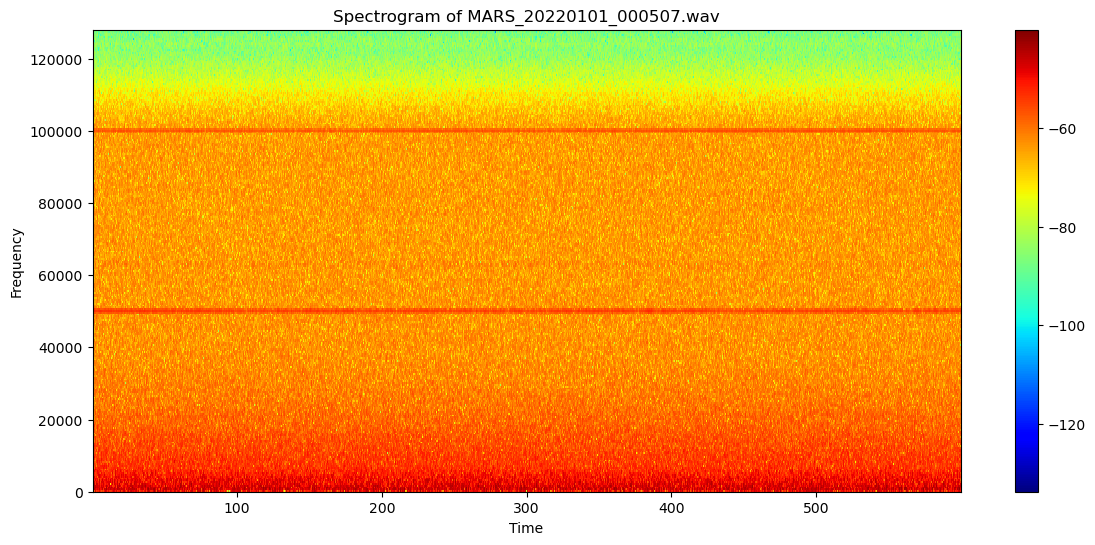

In [17]:
spec = audio_visualization(filename='MARS_20220101_000507.wav', path='./data/california-pam/')